In [8]:
import pandas as pd
import csv
import os
import numpy as np
# Visuals
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(context="notebook",
        rc={"font.size":16,
            "axes.titlesize":16,
            "axes.labelsize":16,
            "xtick.labelsize": 16.0,
            "ytick.labelsize": 16.0,
            "legend.fontsize": 16.0})
palette_ = sns.color_palette("Set1")
palette = palette_[2:5] + palette_[7:]
sns.set_theme(style='whitegrid')

In [9]:

# input_path ='./multi_patch_output/llama2/'
# input_path ='./original_result/gpt-j/'
input_path ='./multi_patch_output/llama2/3_patch/'
# input_path ='./diff_layer_num/result/'
# output_path = input_path+'evaluation/'
# input_path = './diff_layer_num/result/'
output_path = input_path+'evaluation/'

In [ ]:
import warnings
warnings.filterwarnings("ignore")
if not os.path.exists(output_path):
    os.makedirs(output_path)
for input_file in os.listdir(input_path+'factual'):
    if input_file.endswith('.pkl') and "False" in input_file:
        input_file = input_file[:-4]    
    else:
        continue
    fname_out = output_path+input_file+'.pkl'
    # if os.path.exists(fname_out):
    #     print(f"File {fname_out} exists. Skipping...")
    #     continue
    df = pd.read_pickle(input_path+'factual/' + input_file+'.pkl')
    # df = df[df["is_correct_baseline"]].reset_index(drop=True)
    # df = df[df['hidden_rep'].apply(lambda x: isinstance(x, np.ndarray))]
    df = df[df['layer_source']<35].reset_index(drop=True)
    # 初始化df1
    df1 = pd.DataFrame(columns=['subject','prompt_source','prompt_target','layer_source','is_correct_baseline','is_correct_patched','generations'])
    # 遍历df每一行
    for index, row in df.iterrows():
        if df1.empty:
            df1.loc[len(df1)] = [row['subject'],row['prompt_source'],row['prompt_target'], row['layer_source'], row['is_correct_baseline'], row['is_correct_patched'],row['generations_patched_postprocessed']]
            continue
        if row['prompt_source'] != df1.iloc[-1]['prompt_source']:
            df1.loc[len(df1)] = [row['subject'],row['prompt_source'],row['prompt_target'], row['layer_source'], row['is_correct_baseline'], row['is_correct_patched'],row['generations_patched_postprocessed']]
        else:
            if row['layer_source'] > df1.iloc[-1]['layer_source']:
                df1.loc[len(df1)] = [row['subject'],row['prompt_source'],row['prompt_target'], row['layer_source'], row['is_correct_baseline'], row['is_correct_patched'],row['generations_patched_postprocessed']]
            if row['is_correct_patched'] == True:
                # df1最后一行的is_correct_patched改为True
                df1.iloc[-1]['is_correct_patched'] = True
                # df1最后一行的generations改为row['generations_patched_postprocessed']
                df1.iloc[-1]['generations'] = row['generations_patched_postprocessed']

    df1.to_csv(output_path+input_file+'.tsv', sep='\t', index=False)
    df1.to_pickle(output_path+input_file+'.pkl')

In [11]:
def plot_heatmap(input_path,fname, _vmin=0, _vmax=1):    
    df = pd.read_pickle(input_path + fname + '.pkl')
    heatmap_data_patched = df.groupby(['layer_source','prompt_target'])["is_correct_patched"].mean().unstack()
    accuracy = np.mean(df["is_correct_patched"])
    print (f"{fname} Accuracy: {accuracy}")
    ax = sns.heatmap(data=heatmap_data_patched, cmap="crest_r", vmin=_vmin, vmax=_vmax)
    ax.invert_yaxis()
    # ax.set_title(f'Multi patch:{fname} Accuracy: {accuracy:.4f}')
    ax.set_title(f'Single patch:{fname} Accuracy: {accuracy:.4f}')
    plt.show()
    

In [12]:
# output_path = '/data0/tsq/lyx_use/interpretability-master/patchscopes/code/new_data_output/context_from_wiki/evaluation/'
# output_path = './original_result/Qwen/evaluation/'
# output_path = './diff_layer_num/result/evaluation/'
# output_path = './multi_patch_output/Qwen/evaluation/'
# output_path = './original_result/Qwen/evaluation/'
# output_path = './multi_patch_output/Qwen/evaluation/'
# output_path = '/data0/tsq/lyx_use/interpretability-master/patchscopes/code/diff_layer_num/result/evaluation/'

superhero_person_only_correct_False Accuracy: 0.04241941902109033


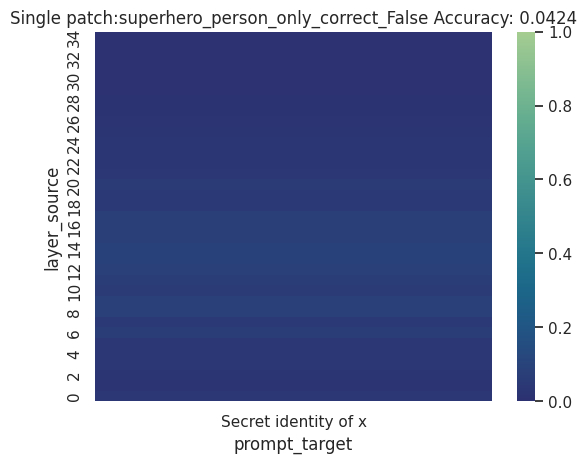

country_capital_city_only_correct_False Accuracy: 0.6157622034360513


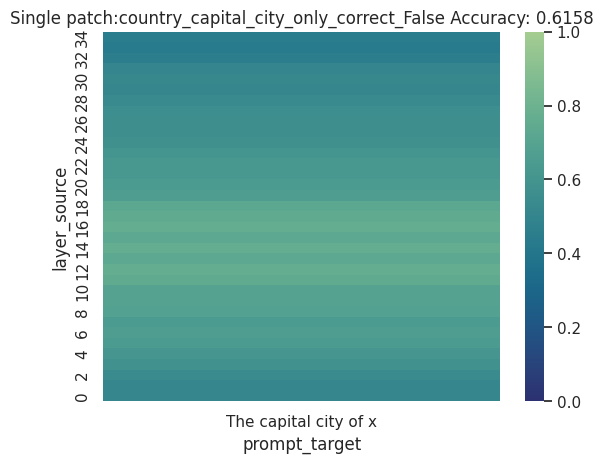

product_by_company_only_correct_False Accuracy: 0.17812051900814885


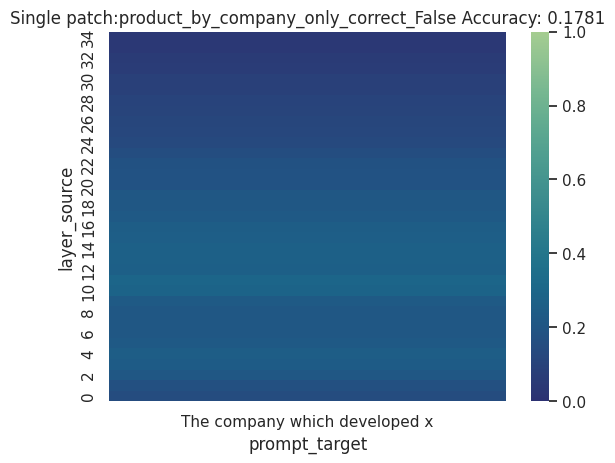

food_from_country_only_correct_False Accuracy: 0.3798449612403101


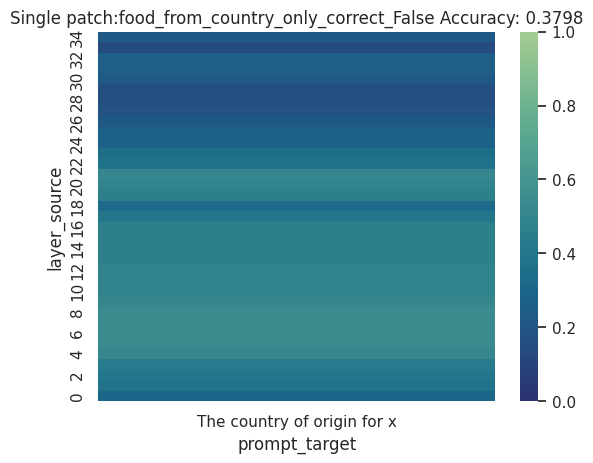

country_largest_city_only_correct_False Accuracy: 0.654434250764526


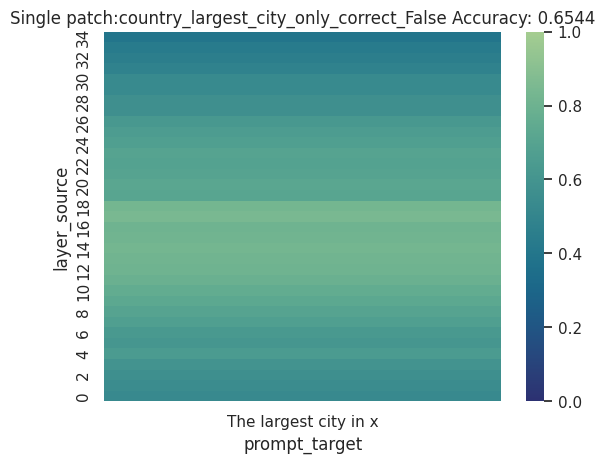

country_currency_only_correct_False Accuracy: 0.7589599437807449


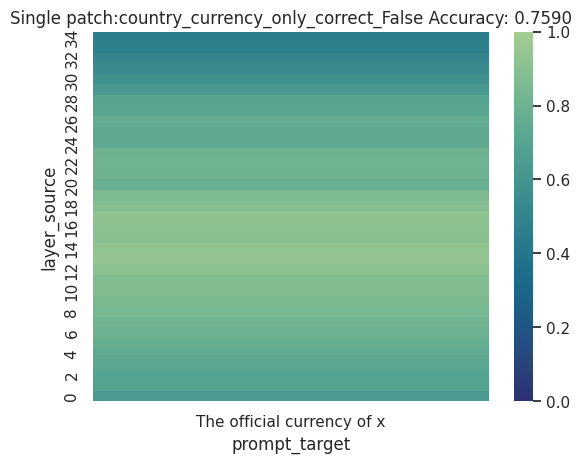

person_plays_position_in_sport_only_correct_False Accuracy: 0.30038671519563237


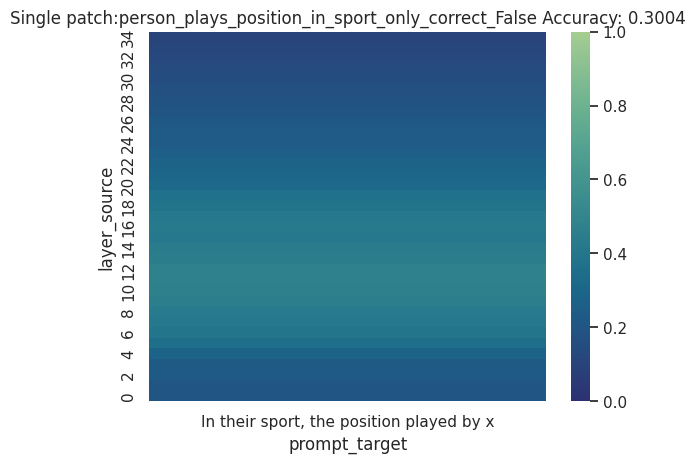

person_plays_pro_sport_only_correct_False Accuracy: 0.0973017394877414


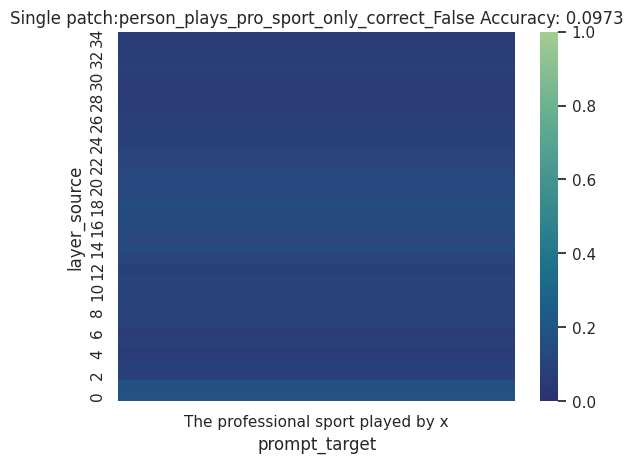

star_constellation_only_correct_False Accuracy: 0.08257652203161789


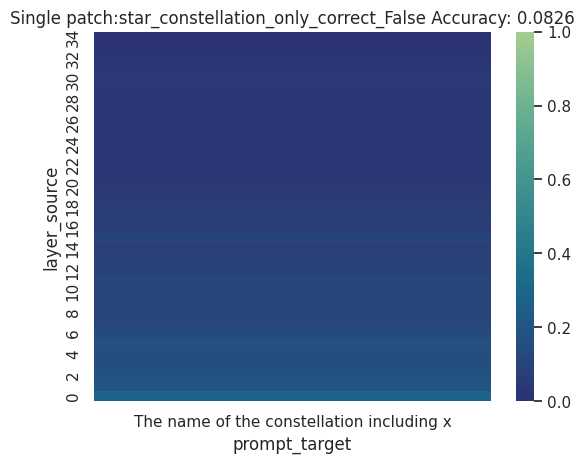

superhero_archnemesis_only_correct_False Accuracy: 0.11061077452104143


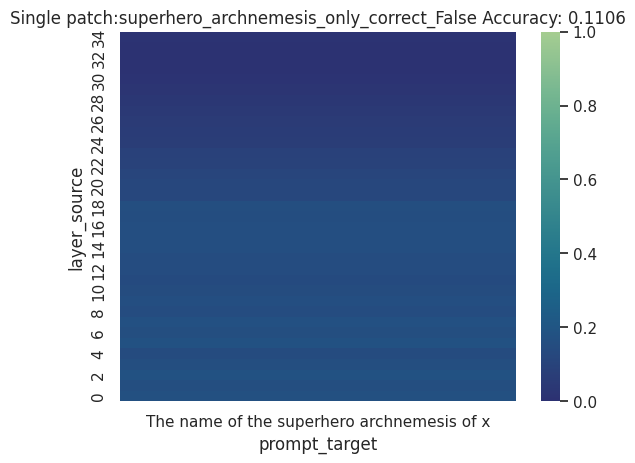

company_ceo_only_correct_False Accuracy: 0.1334188582424631


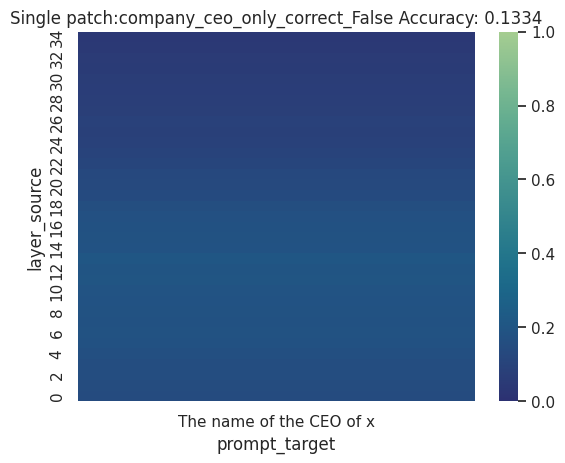

In [13]:
for input_file in os.listdir(output_path):
    if input_file.endswith('.pkl') and "False" in input_file:
        fname = input_file[:-4]
        plot_heatmap(output_path, fname)
    else:
        continue

In [14]:
# df = pd.read_pickle("/data0/tsq/lyx_use/interpretability-master/patchscopes/code/multi_patch_output/gpt-j/factual/company_ceo_only_correct_False.pkl")
# # is_correct_patched设置为object in generation
# print(type(df["object"][0]))
# print(type(df["generations_patched_postprocessed"][0]))
# # 遍历df每一行，把is_correct_patched设置为是否object在generations_patched_postprocessed中
# for index, row in df.iterrows():
#     if row['object'].replace(' ', '').lower() in row['generations_patched_postprocessed'].replace(' ', '').lower():
#         df.loc[index, 'is_correct_patched'] = True
#     else:
#         df.loc[index, 'is_correct_patched'] = False
# print(df['is_correct_patched'].mean())
# df.to_csv("/data0/tsq/lyx_use/interpretability-master/patchscopes/code/multi_patch_output/gpt-j/factual/company_ceo_only_correct_False.tsv", sep='\t', index=False)
# df.to_pickle("/data0/tsq/lyx_use/interpretability-master/patchscopes/code/multi_patch_output/gpt-j/factual/company_ceo_only_correct_False.pkl")